In [1]:
import numpy as np
import sys
sys.path.append("../../")
import matplotlib.pyplot as plt
import gym.spaces
import gym
from agents import *

In [2]:
env = gym.make("FrozenLake8x8-v0")

In [3]:
class PolicyIteration(Agent):
    """
        Policy Iteration: 
            Reference: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/DP.pdf
            Parameters:
                value_map : state values for each state
                policy_map : greedy action choice for each state
                env : gym environment
    """
    def __init__(self,env,gamma=1,eps=1e-10,max_iterations=100):
        super().__init__(env)
        self.values = np.zeros(env.nS)
        self.policy = np.array([np.random.choice(env.nA) for i in range(env.nS)])
        self.eps = eps
        self.gamma = gamma
        self.policy_iteration()
        
    def act(self,observation):
        return self.policy[observation]
        
    def evaluate_policy(self):
        converged = False
        while True:
            new_values = np.zeros(self.env.nS)
            for s in range(self.env.nS):
                p_a = self.policy[s]
                for p , next_s, r, done in self.env.P[s][p_a]:
                    new_values[s] += p*(r + self.gamma*self.values[next_s]) 
            if np.sum(np.abs(new_values - self.values)) <= self.eps:
                break
            for i in range(self.env.nS):
                self.values[i] = new_values[i]
    
    def improve_policy(self):
        for s in range(self.env.nS):
            q_vals = np.zeros(self.env.nA)
            for a in range(self.env.nA):
                for p , next_s, r, done in self.env.P[s][a]:
                    q_vals[a] += p*(r + self.gamma*self.values[next_s])
            self.policy[s] = np.argmax(q_vals)
    
    def policy_iteration(self,max_iterations=100):
        for i in range(max_iterations):
            old_values = self.values.copy()
            self.evaluate_policy()
            self.improve_policy()
            if np.sum(np.abs(old_values - self.values)) <= self.eps:
                break

In [4]:
p = PolicyIteration(env.env)
p.policy

array([0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 2, 3,
       3, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 3, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1,
       3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0])

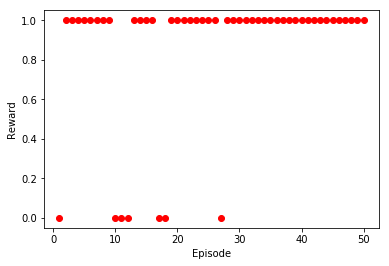

In [5]:
p.play(plot=True)

In [6]:
p.play(render=True,episodes=1)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF